In [125]:
import sys
sys.path.append('../SCR/')
sys.path.append('../SYS/')
import pandapower as pp
import pandapower.networks as pn
import pandapower.estimation as se
from FluxPot import FluxoDePotencia
from EstimadorDeEstados import EstimacaoDeEstados
from gerador_de_cenario import GeradorCenario
import pandas as pd
import random
import math as m
# Importar as bibliotecas necessárias
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import time
# Usando Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# Carregar um conjunto de dados de exemplo
# Nota: A partir do Scikit-learn 1.2, o dataset Boston foi removido. 
# Se você estiver usando uma versão mais recente, substitua o load_boston por um outro dataset como o fetch_california_housing.


In [126]:
EOPF_case14 = "2-10-12-13"
SIA_RNA_case14 = "5-6-7-12"


EOPF_case33 = "7-14-26-27"
SIA_RNA_case33 = "1-4-18-21"

In [127]:
ALOCACAO = EOPF_case14
SISTEMA =  pn.case14
ERRO_MEDIDOR = 1.04

data_SIM = {
    "Descrição": "(Análise 2) : 4 MI com alocação SIA",
}

ANALISE_REALIZADA = data_SIM["Descrição"]


In [128]:
net = SISTEMA()
NBAR = len(net.bus)
NCEN = 2500
NVAL = 10**3
cenario = GeradorCenario(net=net)

In [129]:
RedeEletrica_simulada = net
cenario.DLOAD()
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,19.251170,0.425998,0.0,0.0,NaN,1.0,True,None,False
1,None,2,130.240263,0.425998,0.0,0.0,NaN,1.0,True,None,False
2,None,3,46.816893,0.425998,0.0,0.0,NaN,1.0,True,None,False
3,None,4,10.347108,0.425998,0.0,0.0,NaN,1.0,True,None,False
4,None,5,7.226625,0.425998,0.0,0.0,NaN,1.0,True,None,False
5,None,8,32.020879,0.425998,0.0,0.0,NaN,1.0,True,None,False
6,None,9,9.520932,0.425998,0.0,0.0,NaN,1.0,True,None,False
7,None,10,5.066719,0.425998,0.0,0.0,NaN,1.0,True,None,False
8,None,11,5.749184,0.425998,0.0,0.0,NaN,1.0,True,None,False
9,None,12,12.443405,0.425998,0.0,0.0,NaN,1.0,True,None,False


In [130]:
simulacao = FluxoDePotencia(RedeEletrica_simulada=RedeEletrica_simulada,
data_SIM=data_SIM)   

 [...] Fluxo de Potência Executado 


In [131]:
indexadores = [f"V_{i}" for i in range(1,NBAR+1)]
indexadores = indexadores + [f"Ang_{i}" for i in range(1,NBAR+1)]


df = pd.DataFrame({
        f'Identificador': indexadores
    })
df = df.T

P_index = [f"P_{i}" for i in range(1,NBAR+1)]
histograma_P = pd.DataFrame({
        f'Identificador': P_index
    })

histograma_P = histograma_P.T



In [132]:
inicio_simulacao = time.time()

for n in range(1,NCEN+1):
    RedeEletrica_simulada = net
    cenario.DLOAD()

    rodar_FluxPot = True
    while rodar_FluxPot:
        try:   
            simulacao = FluxoDePotencia(RedeEletrica_simulada=RedeEletrica_simulada,
                                        data_SIM=data_SIM)   
    
            resultado = simulacao.RedeEletrica_simulada.res_bus
            rodar_FluxPot = False
        except:
            print('Sistema não convergiu, sorteando outro')
            RedeEletrica_simulada = net
            cenario.DLOAD()

    amostra = pd.concat([resultado['vm_pu'],resultado['va_degree']])
    amostra = amostra.reset_index(drop=True)
    amostra = amostra.T

    novo_df = pd.DataFrame({
        f'Rodada_{n}': amostra
    })

    df = pd.concat([df,novo_df.T])
    
    P_amostra = resultado['p_mw']
    P_amostra = P_amostra.reset_index(drop=True)
    P_amostra = P_amostra
    
    novo_P = pd.DataFrame({
            f'Rodada_{n}': P_amostra
        })
    histograma_P = pd.concat([histograma_P,novo_P.T])
                             
    print(f'{n}/{NCEN}')

fim_simulacao = time.time()
print(f'TEMPO DE RODADA: {fim_simulacao-inicio_simulacao}')

primeira_linha = df.iloc[0]
df.columns = primeira_linha
df = df.iloc[1:].reset_index(drop=True)

primeira_linha = histograma_P.iloc[0]
histograma_P.columns = primeira_linha
histograma_P = histograma_P[1:].reset_index(drop=True)

 [...] Fluxo de Potência Executado 
1/2500
 [...] Fluxo de Potência Executado 
2/2500
 [...] Fluxo de Potência Executado 
3/2500
 [...] Fluxo de Potência Executado 
4/2500
 [...] Fluxo de Potência Executado 
5/2500
 [...] Fluxo de Potência Executado 
6/2500
 [...] Fluxo de Potência Executado 
7/2500
 [...] Fluxo de Potência Executado 
8/2500
 [...] Fluxo de Potência Executado 
9/2500
 [...] Fluxo de Potência Executado 
10/2500
 [...] Fluxo de Potência Executado 
11/2500
 [...] Fluxo de Potência Executado 
12/2500
 [...] Fluxo de Potência Executado 
13/2500
 [...] Fluxo de Potência Executado 
14/2500
 [...] Fluxo de Potência Executado 
15/2500
 [...] Fluxo de Potência Executado 
16/2500
 [...] Fluxo de Potência Executado 
17/2500
 [...] Fluxo de Potência Executado 
18/2500
 [...] Fluxo de Potência Executado 
19/2500
 [...] Fluxo de Potência Executado 
20/2500
 [...] Fluxo de Potência Executado 
21/2500
 [...] Fluxo de Potência Executado 
22/2500
 [...] Fluxo de Potência Executado 
23/25

In [133]:
df.head()

Identificador,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,Ang_1,Ang_2,Ang_3,Ang_4,Ang_5,Ang_6,Ang_7,Ang_8,Ang_9,Ang_10,Ang_11,Ang_12,Ang_13,Ang_14
0,1.06,1.045,1.01,1.017438,1.018997,1.07,1.071308,1.09,1.077552,1.0728,1.068302,1.061802,1.060264,1.056566,0.0,-5.859503,-15.699198,-12.005204,-10.134676,-15.593197,-15.595256,-15.595256,-17.417713,-17.451866,-16.805408,-16.608651,-16.845928,-18.554069
1,1.06,1.045,1.01,1.014596,1.016488,1.07,1.069163,1.09,1.074896,1.070903,1.067341,1.061567,1.057848,1.049892,0.0,-6.153825,-16.271557,-12.734468,-10.764107,-16.78878,-16.778004,-16.778004,-18.829724,-18.777712,-18.059288,-17.86964,-18.240855,-20.397591
2,1.06,1.045,1.01,1.016527,1.017648,1.07,1.070896,1.09,1.077251,1.072881,1.068274,1.062602,1.058634,1.05435,0.0,-6.443441,-17.611386,-12.953928,-10.9704,-16.827601,-16.650084,-16.650084,-18.525192,-18.540372,-17.97892,-17.807375,-18.197102,-19.912871
3,1.06,1.045,1.01,1.016401,1.017898,1.07,1.070625,1.09,1.076914,1.072557,1.068088,1.062044,1.05898,1.05521,0.0,-5.696812,-14.961266,-11.886443,-10.100476,-15.999897,-15.76845,-15.76845,-17.738112,-17.750953,-17.171302,-17.016799,-17.347076,-19.002383
4,1.06,1.045,1.01,1.014324,1.016341,1.07,1.068881,1.09,1.074467,1.070366,1.066615,1.061981,1.060047,1.057139,0.0,-6.373415,-17.019503,-13.072477,-11.014099,-16.947567,-17.14804,-17.14804,-19.216261,-19.140707,-18.366614,-17.963743,-18.233326,-19.91223


In [134]:
histograma_P.head()

Identificador,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,P_11,P_12,P_13,P_14
0,-270.12317,-25.092679,123.12654,47.6147,9.636071,7.642304,0.0,0.0,39.75673,7.475276,5.401949,6.237051,11.471841,18.082687
1,-284.278389,-27.485873,123.390887,51.34988,9.656179,7.763347,0.0,0.0,45.054976,6.161497,5.25498,5.513327,13.265268,23.567038
2,-294.743674,-26.913571,142.389738,44.674434,11.325413,9.700771,0.0,0.0,39.993034,6.151229,5.68903,4.569617,14.603483,19.915737
3,-264.939306,-26.482035,112.604271,46.492016,10.773048,9.907709,0.0,0.0,43.667366,6.28174,5.701767,5.392842,14.060595,18.688411
4,-293.000258,-27.559545,131.319012,51.710861,9.057061,8.855253,0.0,0.0,52.328894,6.156813,6.150374,5.965552,12.407692,14.671126


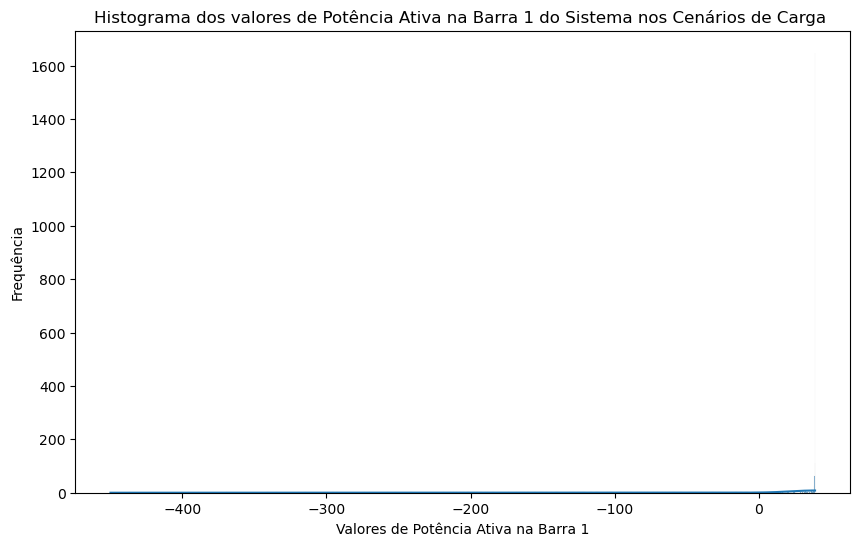

In [135]:
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = histograma_P.P_1.min()
MAX =  histograma_P.P_1.max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.1)
sns.histplot(histograma_P.P_1, kde=True)
plt.title('Histograma dos valores de Potência Ativa na Barra 1 do Sistema nos Cenários de Carga ')
plt.xlabel('Valores de Potência Ativa na Barra 1')
plt.ylabel('Frequência')
#plt.show()
plt.savefig('hist_P')

In [136]:
V = df.loc[:,'V_1':f'V_{NBAR}']
Ang = df.loc[:,'Ang_1':f'Ang_{NBAR}']
ESTADOS = V.join(Ang)


In [137]:
ESTADOS.head()

Identificador,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,Ang_1,Ang_2,Ang_3,Ang_4,Ang_5,Ang_6,Ang_7,Ang_8,Ang_9,Ang_10,Ang_11,Ang_12,Ang_13,Ang_14
0,1.06,1.045,1.01,1.017438,1.018997,1.07,1.071308,1.09,1.077552,1.0728,1.068302,1.061802,1.060264,1.056566,0.0,-5.859503,-15.699198,-12.005204,-10.134676,-15.593197,-15.595256,-15.595256,-17.417713,-17.451866,-16.805408,-16.608651,-16.845928,-18.554069
1,1.06,1.045,1.01,1.014596,1.016488,1.07,1.069163,1.09,1.074896,1.070903,1.067341,1.061567,1.057848,1.049892,0.0,-6.153825,-16.271557,-12.734468,-10.764107,-16.78878,-16.778004,-16.778004,-18.829724,-18.777712,-18.059288,-17.86964,-18.240855,-20.397591
2,1.06,1.045,1.01,1.016527,1.017648,1.07,1.070896,1.09,1.077251,1.072881,1.068274,1.062602,1.058634,1.05435,0.0,-6.443441,-17.611386,-12.953928,-10.9704,-16.827601,-16.650084,-16.650084,-18.525192,-18.540372,-17.97892,-17.807375,-18.197102,-19.912871
3,1.06,1.045,1.01,1.016401,1.017898,1.07,1.070625,1.09,1.076914,1.072557,1.068088,1.062044,1.05898,1.05521,0.0,-5.696812,-14.961266,-11.886443,-10.100476,-15.999897,-15.76845,-15.76845,-17.738112,-17.750953,-17.171302,-17.016799,-17.347076,-19.002383
4,1.06,1.045,1.01,1.014324,1.016341,1.07,1.068881,1.09,1.074467,1.070366,1.066615,1.061981,1.060047,1.057139,0.0,-6.373415,-17.019503,-13.072477,-11.014099,-16.947567,-17.14804,-17.14804,-19.216261,-19.140707,-18.366614,-17.963743,-18.233326,-19.91223


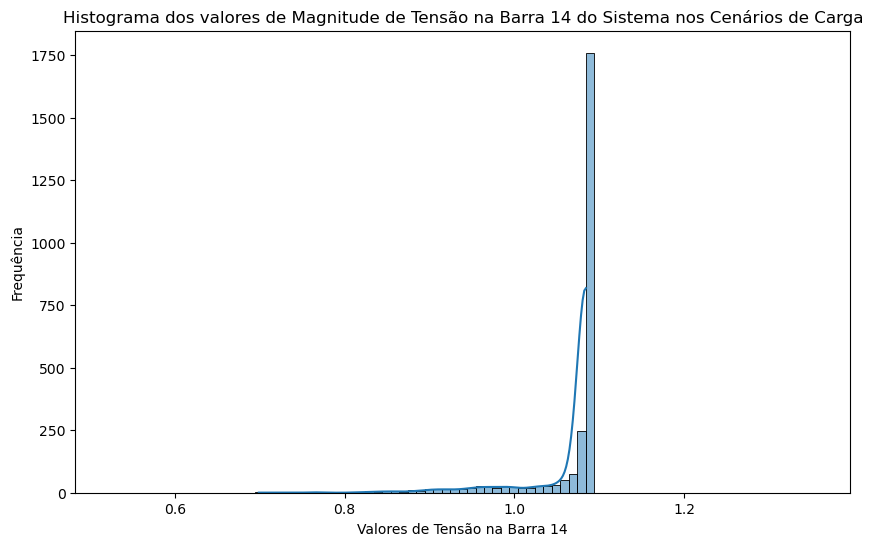

In [138]:
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = ESTADOS[f'V_{NBAR}'].min()
MAX =  ESTADOS[f'V_{NBAR}'].max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.01)
sns.histplot(ESTADOS[f'V_{NBAR}'], bins=bins, kde=True)
plt.title(f'Histograma dos valores de Magnitude de Tensão na Barra {NBAR} do Sistema nos Cenários de Carga')
plt.xlabel(f'Valores de Tensão na Barra {NBAR}')
plt.ylabel('Frequência')
#plt.show()
plt.savefig('hist_V')

In [139]:
MED = [int(i) for i in ALOCACAO.split('-')]
V_med = V[[f'V_{x}' for x in MED]]
Ang_med = Ang[[f'Ang_{x}' for x in MED]]
MEDICOES = V_med.join(Ang_med)



In [140]:
MEDICOES.head()

Identificador,V_2,V_10,V_12,V_13,Ang_2,Ang_10,Ang_12,Ang_13
0,1.045,1.0728,1.061802,1.060264,-5.859503,-17.451866,-16.608651,-16.845928
1,1.045,1.070903,1.061567,1.057848,-6.153825,-18.777712,-17.86964,-18.240855
2,1.045,1.072881,1.062602,1.058634,-6.443441,-18.540372,-17.807375,-18.197102
3,1.045,1.072557,1.062044,1.05898,-5.696812,-17.750953,-17.016799,-17.347076
4,1.045,1.070366,1.061981,1.060047,-6.373415,-19.140707,-17.963743,-18.233326


# RNA

In [141]:
# Criar o modelo de rede neural
mlp = MLPRegressor(hidden_layer_sizes=NBAR,
                   max_iter=1000,
                   solver='adam',
                   random_state=42,
                   tol=0.0001,
                   verbose=True,
                   validation_fraction=0.2,
                   n_iter_no_change=500)

In [142]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(MEDICOES, ESTADOS, test_size=0.3, random_state=42)

# Padronizar os dados (importante para redes neurais)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [143]:
# Treinar o modelo
mlp.fit(X_train, y_train)

Iteration 1, loss = 10.35640863
Iteration 2, loss = 9.07732980
Iteration 3, loss = 7.86454139
Iteration 4, loss = 6.88025303
Iteration 5, loss = 5.94070280
Iteration 6, loss = 5.06745392
Iteration 7, loss = 4.33273697
Iteration 8, loss = 3.66739977
Iteration 9, loss = 3.05817403
Iteration 10, loss = 2.58643420
Iteration 11, loss = 2.12430077
Iteration 12, loss = 1.76183300
Iteration 13, loss = 1.44198484
Iteration 14, loss = 1.20294854
Iteration 15, loss = 0.98404054
Iteration 16, loss = 0.81931818
Iteration 17, loss = 0.68700162
Iteration 18, loss = 0.57868297
Iteration 19, loss = 0.49486449
Iteration 20, loss = 0.42681506
Iteration 21, loss = 0.37158332
Iteration 22, loss = 0.32925445
Iteration 23, loss = 0.29562690
Iteration 24, loss = 0.26643289
Iteration 25, loss = 0.24395656
Iteration 26, loss = 0.22555869
Iteration 27, loss = 0.21065492
Iteration 28, loss = 0.19861451
Iteration 29, loss = 0.18935477
Iteration 30, loss = 0.18114824
Iteration 31, loss = 0.17486775
Iteration 32, lo

/home/lucasedbraga/anaconda3/envs/otm_venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



MLPRegressor(hidden_layer_sizes=14, max_iter=1000, n_iter_no_change=500,
             random_state=42, validation_fraction=0.2, verbose=True)

In [144]:
# Fazer previsões no conjunto de teste
y_pred = mlp.predict(X_test)

# Avaliar o modelo
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.006382832306917145
R^2 Score: -8.519589669361531e+26


# Validacao

In [145]:
def calcula_metricas(df_results):
    SEE = m.sqrt(
            sum(
                ((df_results['vm_pu']-df_results['v_estimated'])**2)
            )
            +
            sum(
                ((np.deg2rad(df_results['va_degree'])-np.deg2rad(df_results['ang_estimated']))**2)
            )
        )
    
    IVM =  abs(
                max(
                    (abs(df_results['vm_pu'])-abs(df_results['v_estimated']))
                    /
                    abs(df_results['vm_pu'])
                )
            )*100
    
    IPA = abs(
                max(
                    (np.deg2rad(df_results['va_degree'])-np.deg2rad(df_results['ang_estimated']))
                )
            )*100
    
    OBF = SEE + IVM + IPA
   
    tabela_resultado = pd.DataFrame({

        '(EEE) SEE' : [SEE],
        '(EMT) IVM' : [IVM],
        '(EAF) IPA' : [IPA],
        '(IGE) OBF' : [OBF]
    })
    return tabela_resultado

In [146]:
df_val =  pd.DataFrame({
    'Identificador': indexadores})
df_val = df_val.T

inicio_simulacao = time.time()
for n in range(1,NVAL+1):

    RedeEletrica_simulada = net
    cenario.DLOAD()
    rodar_FluxPot = True
    while rodar_FluxPot:
        try:   
            simulacao = FluxoDePotencia(RedeEletrica_simulada=RedeEletrica_simulada,
                                        data_SIM=data_SIM)   
    
            resultado = simulacao.RedeEletrica_simulada.res_bus
            rodar_FluxPot = False
        except:
            RedeEletrica_simulada = net
            cenario.DLOAD()


    amostra = pd.concat([resultado['vm_pu'],resultado['va_degree']])
    amostra = amostra.reset_index(drop=True)
    amostra = amostra.T
    amostra_val = pd.DataFrame({f'Validacao_{n}': amostra})
    df_val = pd.concat([df_val,amostra_val.T])
    print(f'{n}/{NVAL}')

fim_simulacao = time.time()
print(f'TEMPO DE RODADA: {fim_simulacao-inicio_simulacao}')


primeira_linha = df_val.iloc[0]
df_val.columns = primeira_linha
df_val = df_val.iloc[1:].reset_index(drop=True)
V_teste = df_val[[f'V_{x}' for x in MED]]
Ang_teste = df_val[[f'Ang_{x}' for x in MED]]
MEDICOES_teste = V_teste.join(Ang_teste)

# Gerar um valor aleatório
# Função para multiplicar por um valor aleatório
def erro_de_medicao(x):
    valor_aleatorio = np.random.uniform(1, ERRO_MEDIDOR)
    return x * valor_aleatorio

# Multiplicar cada elemento do DataFrame pelo valor aleatório
MEDICOES_teste = MEDICOES_teste.applymap(erro_de_medicao)


 [...] Fluxo de Potência Executado 
1/1000
 [...] Fluxo de Potência Executado 
2/1000
 [...] Fluxo de Potência Executado 
3/1000
 [...] Fluxo de Potência Executado 
4/1000
 [...] Fluxo de Potência Executado 
5/1000
 [...] Fluxo de Potência Executado 
6/1000
 [...] Fluxo de Potência Executado 
7/1000
 [...] Fluxo de Potência Executado 
8/1000
 [...] Fluxo de Potência Executado 
9/1000
 [...] Fluxo de Potência Executado 
10/1000
 [...] Fluxo de Potência Executado 
11/1000
 [...] Fluxo de Potência Executado 
12/1000
 [...] Fluxo de Potência Executado 
13/1000
 [...] Fluxo de Potência Executado 
14/1000
 [...] Fluxo de Potência Executado 
15/1000
 [...] Fluxo de Potência Executado 
16/1000
 [...] Fluxo de Potência Executado 
17/1000
 [...] Fluxo de Potência Executado 
18/1000
 [...] Fluxo de Potência Executado 
19/1000
 [...] Fluxo de Potência Executado 
20/1000
 [...] Fluxo de Potência Executado 
21/1000
 [...] Fluxo de Potência Executado 
22/1000
 [...] Fluxo de Potência Executado 
23/10

In [147]:
MEDICOES_teste.head()

Identificador,V_2,V_10,V_12,V_13,Ang_2,Ang_10,Ang_12,Ang_13
0,1.079528,1.116911,1.076830,1.096563,1.387802,1.047866,1.335651,1.299572
1,1.046982,1.098076,1.072858,1.078272,1.390139,1.058253,1.324654,1.262545
2,1.069266,1.097729,1.105736,1.076989,1.404081,1.059151,1.338282,1.257342
3,1.075932,1.132512,1.071401,1.102614,1.409409,1.031952,1.356345,1.263564
4,1.073103,1.099402,1.073126,1.096972,1.386711,1.049180,1.345263,1.258209


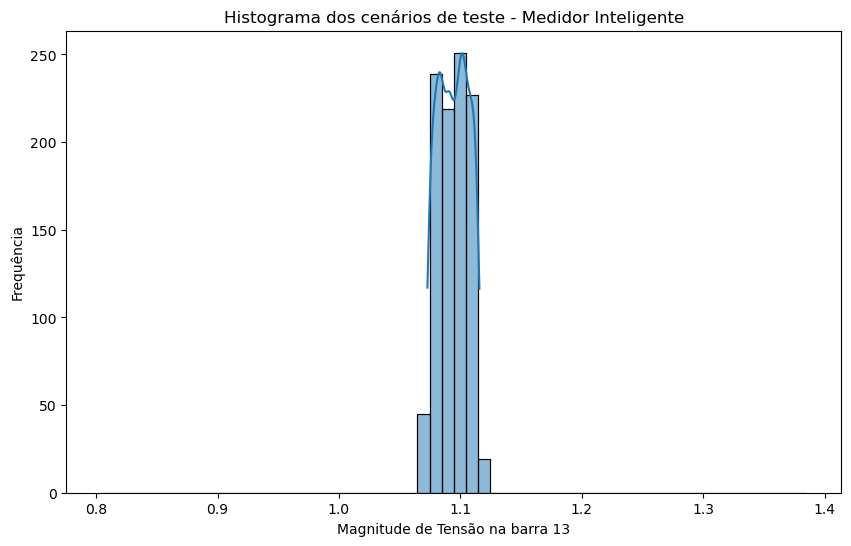

In [148]:
# Usando Seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
# Definindo os bins de 0 a 5 com step de 0.1
MIN = MEDICOES_teste[f'V_{max(MED)}'].min()
MAX =  MEDICOES_teste[f'V_{max(MED)}'].max()
bins = np.arange(0.75*MIN, 1.25*MAX, 0.01)
sns.histplot(MEDICOES_teste[f'V_{max(MED)}'], bins=bins, kde=True)
plt.title('Histograma dos cenários de teste - Medidor Inteligente')
plt.xlabel(f'Magnitude de Tensão na barra {max(MED)}')
plt.ylabel('Frequência')
plt.show()

In [149]:
# Fazer previsões no conjunto de teste
inicio_simulacao = time.time()
y_pred_val = mlp.predict(MEDICOES_teste)
fim_simulacao = time.time()
print(f'TEMPO DE RODADA: {fim_simulacao-inicio_simulacao}')

TEMPO DE RODADA: 0.0077707767486572266


In [150]:
df_results =  pd.DataFrame()

for cenario_teste in range(len(y_pred_val)):
    predicao = pd.Series(y_pred_val[cenario_teste])
    V_estimado = predicao[:NBAR].reset_index(drop=True)
    Ang_estimado = predicao[NBAR:].reset_index(drop=True)
    real = simulacao.RedeEletrica_simulada.res_bus
    
    df_cenario = real
    df_cenario['v_estimated'] = V_estimado
    df_cenario['ang_estimated'] = Ang_estimado
    
    df_results = pd.concat([df_results,calcula_metricas(df_results=df_cenario)])

In [151]:
df_results.head()

,(EEE) SEE,(EMT) IVM,(EAF) IPA,(IGE) OBF
0,0.060819,0.548835,0.034418,0.644072
0,0.015468,0.686505,0.079861,0.781833
0,0.024027,1.425274,0.158918,1.608220
0,0.055822,0.143272,0.061911,0.261005
0,0.039743,0.429712,0.034033,0.503488


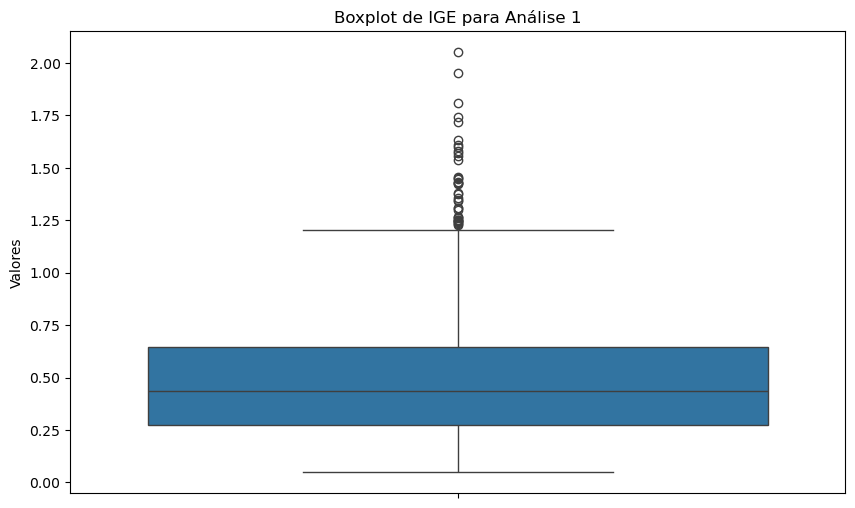

In [152]:
# Plotar o boxplot para a coluna_exemplo
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_results['(IGE) OBF'])
plt.title('Boxplot de IGE para Análise 1')
plt.ylabel('Valores')
plt.show()

In [153]:
# Gerar a tabela LaTeX
RESULTADO = pd.DataFrame(
    {
        'FOB_medio': [df_results['(IGE) OBF'].mean()],
        'FOB_devpad': [df_results['(IGE) OBF'].std()],
        'EMT_medio':[df_results['(EMT) IVM'].mean()],
        'EMT_devpad':[df_results['(EMT) IVM'].std()],
        'EAF_medio':[df_results['(EAF) IPA'].mean()],
        'EAF_devpad':[df_results['(EAF) IPA'].std()],
        'EEE_medio': [df_results['(EEE) SEE'].mean()],
        'EEE_devpad': [df_results['(EEE) SEE'].std()],
        #'(EEE) SEE_devpad': [df_results.SEE.std()],
        #'(EEE) SEE_max': [df_results.SEE.max()],    
    }
)

RESULTADO

,FOB_medio,FOB_devpad,EMT_medio,EMT_devpad,EAF_medio,EAF_devpad,EEE_medio,EEE_devpad
0,0.500248,0.313106,0.416847,0.290742,0.045819,0.046156,0.037581,0.014338


In [154]:
latex_table = RESULTADO.to_latex(index=False)

# Salvar a tabela LaTeX em um arquivo
with open('tabela.tex', 'w') as f:
    f.write(latex_table)

/tmp/ipykernel_28083/128792389.py:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



# ANALISE RNA

In [155]:
def compara_tensao(data_vm_pu_calc, data_vm_pu_est, analise_realizada):

    def plot_comparativo(series1, series2, analise_realizada):
        # Verificar se as séries têm o mesmo índice
        if not series1.index.equals(series2.index):
            raise ValueError("Os índices das séries devem ser iguais.")
        
        # Definir categorias como índices das séries
        categorias = series1.index.tolist()
        
        # Obter os valores das séries
        valores1 = series1.values.tolist()
        valores2 = series2.values.tolist()
        
        # Calcular a diferença entre os valores das séries
        diferenca = series1 - series2
        
        # Criar figura com duas subplots (gráfico de barras e gráfico de linha)
        fig = go.Figure()
        
        # Adicionar as duas barras ao gráfico de barras
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores1,
            name='REAL',  # Nome da primeira série
            marker=dict(color='#008000')
        ))
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores2,
            name='ESTIMADO',
            marker=dict(color='#FFC107')  # Nome da segunda série
        ))
        
        # Criar subplot para o gráfico de linha
        fig.add_trace(go.Scatter(
            x=list(range(1, len(categorias) + 1)),
            y=diferenca.values.tolist(),
            mode='lines+markers',
            name='Erro',  # Nome da linha
            yaxis='y2',
            line=dict(color='red')  # Utiliza o segundo eixo y para o gráfico de linha
        ))
        
        # Encontrar o máximo valor absoluto da diferença
        max_diff = abs(diferenca).max()
        
        # Atualizar layout
        fig.update_layout(
            title=f'Estimação de Estados por RNA - {analise_realizada}',
            xaxis=dict(title='Barras', tickmode='array', tickvals=list(range(1, len(categorias) + 1)), ticktext=categorias),
            yaxis=dict(title='Magnitude de Tensão (pu)'),
            yaxis2=dict(title='Erro', overlaying='y', side='right', range=[-max_diff, max_diff]),  # Configurações do segundo eixo y
            barmode='group'  # Agrupa as barras
        )


        # # Definir layout da figura
        # fig.update_layout(
        #     width=15*37.79527559,  # 5 polegadas convertidas para pixels (1 polegada = 96 pixels)
        #     height=8*37.79527559,  # 3 polegadas convertidas para pixels
        #     margin=dict(l=0, r=0, t=0, b=0)  # Margens ajustadas para se ajustarem ao documento IEEEtran
        # )
        
        # Mostrar gráfico
        fig.show()
        
    plot_comparativo(series1=data_vm_pu_calc, series2=data_vm_pu_est, analise_realizada=analise_realizada)
 


In [156]:
def compara_angulo(data_vm_pu_calc, data_vm_pu_est, analise_realizada):

    def plot_comparativo(series1, series2, analise_realizada):
        # Verificar se as séries têm o mesmo índice
        if not series1.index.equals(series2.index):
            raise ValueError("Os índices das séries devem ser iguais.")
        
        # Definir categorias como índices das séries
        categorias = series1.index.tolist()
        
        # Obter os valores das séries
        valores1 = series1.values.tolist()
        valores2 = series2.values.tolist()
        
        # Calcular a diferença entre os valores das séries
        diferenca = series1 - series2
        
        # Criar figura com duas subplots (gráfico de barras e gráfico de linha)
        fig = go.Figure()
        
        # Adicionar as duas barras ao gráfico de barras
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores1,
            name='REAL',  # Nome da primeira série
            marker=dict(color='#008000')
        ))
        fig.add_trace(go.Bar(
            x=list(range(1, len(categorias) + 1)),
            y=valores2,
            name='ESTIMADO',
            marker=dict(color='#FFC107')  # Nome da segunda série
        ))
        
        # Criar subplot para o gráfico de linha
        fig.add_trace(go.Scatter(
            x=list(range(1, len(categorias) + 1)),
            y=diferenca.values.tolist(),
            mode='lines+markers',
            name='Erro',  # Nome da linha
            yaxis='y2',
            line=dict(color='red')  # Utiliza o segundo eixo y para o gráfico de linha
        ))
        
        # Encontrar o máximo valor absoluto da diferença
        max_diff = abs(diferenca).max()
        
        # Atualizar layout
        fig.update_layout(
            title=f'Estimação de Estados por RNA - {analise_realizada}',
            xaxis=dict(title='Barras', tickmode='array', tickvals=list(range(1, len(categorias) + 1)), ticktext=categorias),
            yaxis=dict(title='Abertura Angular (graus)'),
            yaxis2=dict(title='Erro', overlaying='y', side='right', range=[-max_diff, max_diff]),  # Configurações do segundo eixo y
            barmode='group'  # Agrupa as barras
        )
        #         # Definir layout da figura
        # fig.update_layout(
        #     width=15*37.79527559,  # 5 polegadas convertidas para pixels (1 polegada = 96 pixels)
        #     height=8*37.79527559,  # 3 polegadas convertidas para pixels
        #     margin=dict(l=0, r=0, t=0, b=0)  # Margens ajustadas para se ajustarem ao documento IEEEtran
        # )
        
        
        # Mostrar gráfico
        fig.show()
        
    plot_comparativo(series1=data_vm_pu_calc, series2=data_vm_pu_est, analise_realizada=analise_realizada)
 


In [157]:
df_cenario.head()

,vm_pu,va_degree,p_mw,q_mvar,v_estimated,ang_estimated
0,1.060000,0.000000,3.903323e+01,-44.083341,1.058919,-0.007488
1,1.045000,1.370150,-4.000000e+01,22.592891,1.054802,1.379691
2,1.010000,1.799165,3.681777e-14,38.206738,1.015948,1.814948
3,1.039607,1.136586,3.891751e-14,0.425998,1.049234,1.149681
4,1.038744,1.111599,1.952225e-11,0.425998,1.040736,1.127837


In [158]:
# Calcular a diferença entre as duas colunas
erro = abs(df_cenario['vm_pu'] - df_cenario['v_estimated'])
df_cenario['dif_v'] = erro
# Plotar um gráfico de barras usando Plotly
fig = px.bar(df_cenario, x=df_cenario.index, y='dif_v', labels={'x': 'Índice', 'Diferença': 'Diferença'})
fig.show()


In [159]:
# Calcular a diferença entre as duas colunas
erro = abs(df_cenario['va_degree'] - df_cenario['ang_estimated'])
df_cenario['dif_ang'] = erro

# Plotar um gráfico de barras usando Plotly
fig = px.bar(df_cenario, x=df_cenario.index, y='dif_ang', labels={'x': 'Índice', 'Diferença': 'Diferença'})
fig.show()


In [160]:
compara_tensao(data_vm_pu_calc=real.vm_pu, data_vm_pu_est= V_estimado, analise_realizada=ANALISE_REALIZADA)

In [161]:
compara_angulo(data_vm_pu_calc=real.va_degree, data_vm_pu_est= Ang_estimado,analise_realizada=ANALISE_REALIZADA)